In [1]:
import glob
from bs4 import BeautifulSoup
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt
import seaborn as sns


all_files = glob.glob("./data/*.html")

In [3]:
header = []
data = []
month = {
  "January": "1",
  "February": "2",
  "March": "3",
  "April": "4",
  "May":"5",
  "June":"6",
  "July":"7",
  "August":"8",
  "September":"9",
  "October":"10",
  "November":"11",
  "December":"12"
}
for file in all_files:
    song_soup = BeautifulSoup(open(file, encoding="utf8"),"html.parser")

    date=''
    for row in song_soup.find_all('tr'):
        th = row.find_all('th')
        new_row=[]
        if th:
            if len(header)==0:
                for _th in th:
                    if len(_th.contents) ==3:
                        header.append(_th.contents[0]+" "+_th.contents[2])
                    else:
                        header.append(_th.contents[0])
        else:
            td = row.find_all('td')
            if td:
                if len(td)==6:
                    count=0
                    for _td in td:
                        a=_td.find_all('a')
                        if a:
                            for _a in a:
                                if count==0:
                                    _a.contents[0] = _a.contents[0].split(" ")[1]+"/"+month[_a.contents[0].split(" ")[0]]
                                    date = _a.contents[0]
                                new_row.append(_a.contents[0])
                        else:
                            if count==0 and len(_td.contents)==0:
                                new_row.append(date)
                            else:
                                if len(_td.contents)>0:
                                    if count==4:
                                        revenue_num=int(''.join(_td.contents[0].split('$')[1].split(',')))
                                        if revenue_num>0:
                                            new_row.append(revenue_num)
                                    else:
                                        new_row.append(_td.contents[0])

                                else:
                                    if count!=2:
                                        new_row.append('')

                        count = count+1

        if len(new_row)==6:
            data.append(new_row)
            

with open('movies.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    for _data in data:
        writer.writerow(_data)

In [4]:
df = pd.read_csv('movies.csv', ',')
df

,Release Date,Movie,Genre,Release Type,Revenue to Date,Trailer
0,6/1,Houseguest,Comedy,Theatrical,26325256,
1,6/1,Showgirls,Drama,Theatrical,37750754,
2,11/1,Higher Learning,Drama,Theatrical,38023585,
3,13/1,Far from\r\n ...,Adventure,Theatrical,11380788,
4,13/1,Tales from the Crypt:\r\n ...,Horror,Theatrical,21089146,
...,...,...,...,...,...,...
271,29/12,Dead Man Walking,Drama,Theatrical,83088295,
272,29/12,Mr. Holland’s Opus,Drama,Theatrical,106282604,
273,29/12,Restoration,Drama,Theatrical,4100000,
274,29/12,Richard III,Drama,Theatrical,4199334,


In [5]:
# הדאטא שלנו מסוג חיזוי
# אנחנו רוצים לנחש את העמודה Revenue to Date
#  לנו אין data leakage
# מודל 0 יחזיר את כל הממוצע של עמודת הרווחים ואז לראות מה יותר גדול
# ניתן לנחש שסרטי קומדיה הם יותר רווחים ושסרטים שיוצאים בקיץ יותר רווחים - חודשי יולי אוגוסט

In [6]:
df.Genre.unique()

Geners = {
  "Romantic Comedy": "1",
  "Comedy": "2",
  "Adventure": "3",
  "Western": "4",
  "Action":"5",
  "Horror":"6",
  "Thriller/Suspense":"7",
  "Drama":"8",
  "Black Comedy":"9",
  "Documentary":"10"
}
count_g=0
for genre in df.Genre:
  df.Genre[count_g] = Geners[genre]
  count_g+=1

# only monthes
count_d=0
for release_date in df["Release Date"]:
  df["Release Date"][count_d] = release_date.split("/")[1]
  count_d+=1


<ipython-input-6-eb9c7f308cb0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Genre[count_g] = Geners[genre]
<ipython-input-6-eb9c7f308cb0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Release Date"][count_d] = release_date.split("/")[1]


array(['2', '8', '3', '6', '5', '7', '1', '10', '4', '9'], dtype=object)

In [7]:
df

,Release Date,Movie,Genre,Release Type,Revenue to Date,Trailer
0,1,Houseguest,2,Theatrical,26325256,
1,1,Showgirls,8,Theatrical,37750754,
2,1,Higher Learning,8,Theatrical,38023585,
3,1,Far from\r\n ...,3,Theatrical,11380788,
4,1,Tales from the Crypt:\r\n ...,6,Theatrical,21089146,
...,...,...,...,...,...,...
271,12,Dead Man Walking,8,Theatrical,83088295,
272,12,Mr. Holland’s Opus,8,Theatrical,106282604,
273,12,Restoration,8,Theatrical,4100000,
274,12,Richard III,8,Theatrical,4199334,


In [8]:
df = df.drop(['Release Type', 'Trailer'],axis=1)
y = df["Revenue to Date"].to_numpy()
x = df.drop(['Revenue to Date', 'Movie'],axis=1).to_numpy()
# x = df['Release Date'].to_numpy()


In [9]:
x

array([['1', '2'],
       ['1', '8'],
       ['1', '8'],
       ['1', '3'],
       ['1', '6'],
       ['1', '5'],
       ['1', '7'],
       ['1', '8'],
       ['1', '2'],
       ['1', '8'],
       ['1', '8'],
       ['1', '5'],
       ['1', '1'],
       ['1', '10'],
       ['1', '8'],
       ['2', '10'],
       ['2', '8'],
       ['2', '6'],
       ['2', '2'],
       ['2', '3'],
       ['2', '2'],
       ['2', '4'],
       ['2', '9'],
       ['2', '8'],
       ['2', '2'],
       ['2', '2'],
       ['2', '7'],
       ['2', '2'],
       ['2', '8'],
       ['2', '5'],
       ['2', '8'],
       ['2', '8'],
       ['3', '5'],
       ['3', '6'],
       ['3', '2'],
       ['3', '6'],
       ['3', '2'],
       ['3', '8'],
       ['3', '2'],
       ['3', '7'],
       ['3', '8'],
       ['3', '2'],
       ['3', '6'],
       ['3', '8'],
       ['3', '8'],
       ['3', '2'],
       ['3', '1'],
       ['3', '7'],
       ['3', '2'],
       ['3', '8'],
       ['3', '4'],
       ['3', '1'],
       ['3

In [10]:
y

array([ 26325256,  37750754,  38023585,  11380788,  21089146,      2261,
         3529515,     57595,   1918424,  17300238,   5691852,  13738574,
         5086578,     38773,      1207,  64800000,  23418200,   8925803,
         7555256,   6101815,  25460475,  18552460,   2834250,     89720,
        46546167,  17671310,  36853222,    144961,    431105,   6420615,
         2201126,   6014340,   4391379,  12201255,  40029009,   1781000,
        12091317,    766000,  15188311, 190023573,  23389975,  12073560,
        13916665,   1434847,   7564608,     41628,    397566,  24262193,
        29412050,   4165845,   8247627,    479945,      1424,   3730409,
          529135,   2461628,  32648673,    407618,    757088, 141247413,
        22032635,  35336439,  31390587,  16941552,   3939728,    911310,
         3540207,   2423016,   3060660,   2513250,  14942422,    376928,
         2302338, 182057016,  34240094,  27936778,   1173149,   1238905,
          759196,    389731,   4992085,    536023, 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
rm = lm()
rm.fit(x_train, y_train)


LinearRegression()

In [13]:
predictions=rm.predict(x_test)
print(y_test)

[   284613   7555256    470768  31390587    150210    479945    302696
  27688744  13738574  33194512   5086578  36466570 138486431     60301
    223174    472370   2477155  57956568  15188311   2794056   2739002
   2363472  14942422   3794761  21089146   8925803  11268750      6869
    389731 182057016  23837227  83088295   2702000      8423      2261
     99318 190023573    757088    178104    553454  98393930  21840274
 175516617  40029009     52609   1095215    560491    240280   6849998
   5691405 113487912    144961    718490  22119269     94558  24670346]


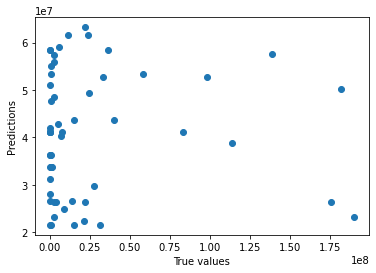

In [14]:
plt.scatter(y_test,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

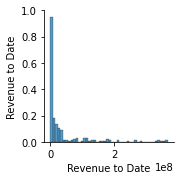

In [15]:
sns.pairplot(df)